### IMPORTACIÓN DE PAQUETES

In [1]:
import pandas as pd
from fbprophet import Prophet

### DATA



In [5]:
df = pd.read_csv('/content/Liquor.csv')
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


### MODELO

In [6]:
modelo = Prophet()
modelo.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### PREDICCIÓN


#### Paso 1: Crear el dataframe donde colocaremos los resultados

In [7]:
future = modelo.make_future_dataframe(periods=36,freq = 'MS')
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [8]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [9]:
future.tail()

,ds
355,2021-08-01
356,2021-09-01
357,2021-10-01
358,2021-11-01
359,2021-12-01



#### Paso 2: Realizar los pronósticos y guardarlos en forecast

In [11]:
forecast = modelo.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
355,2021-08-01,5389.825785,5272.640057,5593.312516,5362.385799,5416.750809,38.991843,38.991843,38.991843,38.991843,38.991843,38.991843,0.0,0.0,0.0,5428.817628
356,2021-09-01,5405.889555,5105.305898,5436.213539,5377.206603,5433.990008,-128.600089,-128.600089,-128.600089,-128.600089,-128.600089,-128.600089,0.0,0.0,0.0,5277.289465
357,2021-10-01,5421.435139,5198.421101,5546.860307,5391.723937,5450.948610,-46.478501,-46.478501,-46.478501,-46.478501,-46.478501,-46.478501,0.0,0.0,0.0,5374.956638
358,2021-11-01,5437.498909,5331.374981,5673.877974,5406.621923,5468.087756,67.217509,67.217509,67.217509,67.217509,67.217509,67.217509,0.0,0.0,0.0,5504.716419
359,2021-12-01,5453.044493,6369.954276,6703.751879,5420.933867,5484.867145,1087.473285,1087.473285,1087.473285,1087.473285,1087.473285,1087.473285,0.0,0.0,0.0,6540.517778


In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
348,2021-01-01,4834.369868,4656.429234,4977.854907
349,2021-02-01,4806.055989,4630.367838,4976.411029
350,2021-03-01,5117.627640,4973.813934,5284.831427
351,2021-04-01,5124.037916,4971.117626,5291.808713
352,2021-05-01,5385.689353,5221.957988,5558.459874
353,2021-06-01,5369.313031,5203.387693,5532.542577
354,2021-07-01,5506.439404,5340.316266,5672.232636
355,2021-08-01,5428.817628,5272.640057,5593.312516
356,2021-09-01,5277.289465,5105.305898,5436.213539
357,2021-10-01,5374.956638,5198.421101,5546.860307


#### Paso 3: Graficar los pronósticos


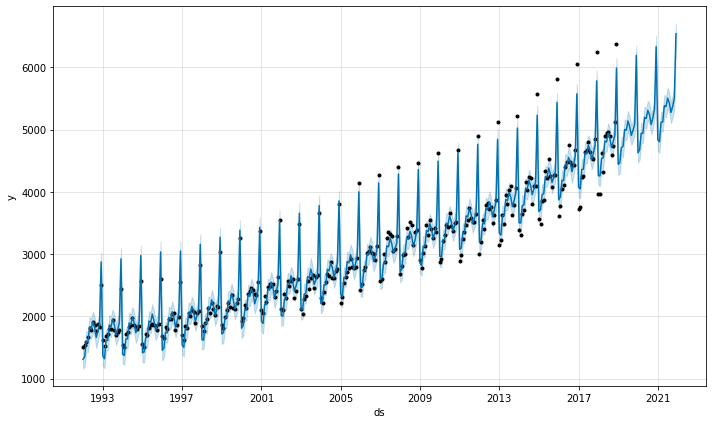

In [14]:
modelo.plot(forecast);

In [15]:
pd.plotting.register_matplotlib_converters()

(735234.0, 738156.0)

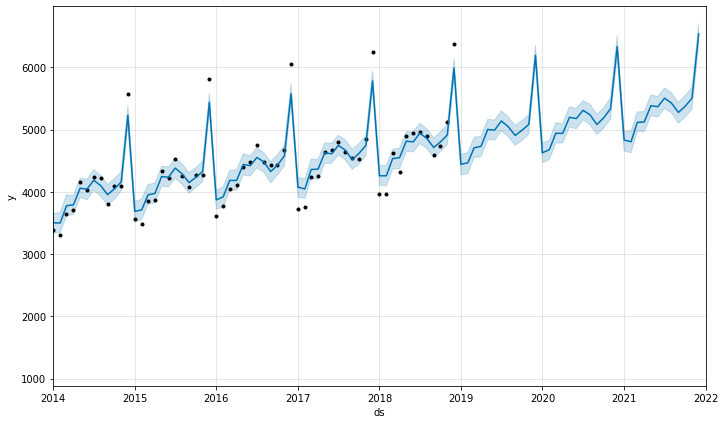

In [16]:
import matplotlib.pyplot as plt
modelo.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

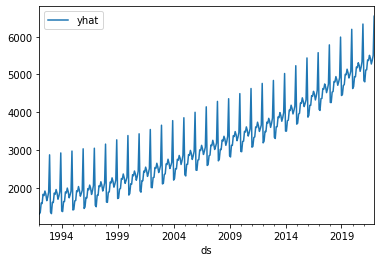

In [17]:
forecast.plot(x='ds',y='yhat')

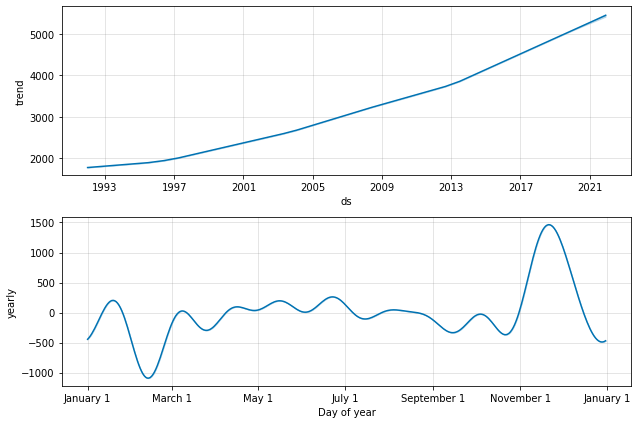

In [18]:
modelo.plot_components(forecast);
